<figure>
  <IMG SRC="LogoENSEGID.png" WIDTH=125 ALIGN="right">
</figure>

# ESSAIS DE NAPPE - RESOLUTION DU PROBLEME INVERSE - METHODE DE THEIS

# Solutions applicables en nappe captive d'extension infinie

Préambule: ce cours est adapté en partie du cours "Transient Groundwater Flow Short Course (Module 3 at UNESCO-IHE, Delft, Netherlands)" construit par Theo Olsthoorn, 08-Jan-2018 et du "Guide des essais de pompage et leurs interprétations" par R.P. Chapuis, 2007

Les essais de nappe sont réalisés pour obtenir les propriétés hydrodynamiques (transmissivité et coefficient d'emmagasinnement) de l'aquifère. Cette détermination est basée sur l'exploitation des données obtenues lors de la réalisation d'un pompage d'essai sur le site de caractérisation. Cette approche constitue la résolution du problème inverse en hydrogéologie.

La réalisation de ce type de test nécessite a minima d'enregistrer sur un ou plusieurs ouvrages (cf. vidéo ci-après):
- le rabattement au cours du temps (la différence entre la hauteur piézométrique au repos dans l'ouvrage et la durant le pompage)  aux piézomètres d'observation;
- le débit d'exploitation au puits de pompage.

L'interprétation de l'essai de nappe en nappe captive est basée sur l'exploitation de la solution de Theis à l'équation de diffusivité. L'utilisation a minima d'un piézomètre d'observation peut être complétée par d'autres piézomètres afin de compléter l'estimation des paramètres de l'aquifère et avoir une idée notamment de son hétérogénéïté.

A la fin de la partie de terrain, on doit disposer du jeu de données suivant:
- valeur du débit (supposé constant) au puits de pompage;
- valeur du rabattement au cours du temps $ s = f(t)$ à la distance $r$ du piézomètre et éventuellement aux autres piézomètres d'observation.

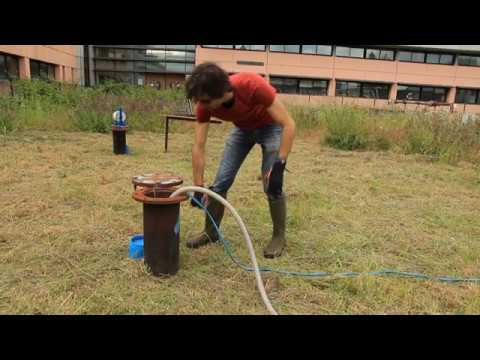

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('0rRd_DqilwI')

# Résolution graphique standard - Méthode de Theis

## Résolution graphique - Principe général
Petit rappel pour la solution de Theis (1) pour un aquifère de transmissivité $T$, de coefficient d'emmagasinement $S$ et soumis à un pompage constant au débit $Q$:

$$
    s = \frac{Q}{4 \pi T} W(u)
$$

avec (2) pour une observation à $t$ à la distance $r$ du puits de pompage:

$$
u = \frac{r^2S}{4Tt}
$$

La solution de Theis (1) peut être ecrite (3):
$$
    s = \frac{QW(u)}{4 \pi T} 
$$

Soit en logarithmes décimaux (4):
$$
log \ s = log \ (Q/4\pi T) + log \ W(u)
$$

L'équation (2) peut également être réécrite (5):
$$
r^2/t = 4uT/S
$$

et en logarithmes décimaux (6)
$$
log \ (r^2/t) = log \ (4T/S) + log \ u
$$

La méthode classique d'interprétation graphique de Theis est basée sur l'exploitation de la courbe théorique de Theis reportée sur un papier bi-log. Les axes du graphique retenus pour la fonction de Theis sont les couples  $log \ W(u)$ versus $log \ (1/u)$ ou $log \ W(u)$ versus $log \ (u)$. Le choix de $1/u$ au lieu de $u$ permet d'obtenir une courbe de Theis d'allure plus intuitive et directement comparable à la courbe expérimentale $s = f(t)$ obtenue lors de l'essai de nappe sur le terrain puisque le rabattement croît proportionnellement à l'augmentation du temps $t$ de pompage.

Les données expérimentales de l'essai de pompage sont tracées sur un papier bilog avec comme choix des axes $log \ (s)$ versus $log \ (r^2/t)$ ou $log \ (s)$ versus $log \ (t/r^2)$.

**------------  Apparté  -------------**

Propriétés du $ log $
$$
log(A \times B / C) = log \ (A) + log / (B) - log \ (C)
$$
Sur un graphique log-log, la courbe $log(A)$ est identique à la courbe $log(A*B/C)$ avec un décalage de $log(B)-log(C)$  
Le décalage entre les deux courbes peut etre déterminé graphiquement en superposant visuellement les 2 courbes dans leurs repères de coordonnées respectifs (*Curve matching*). Le décalage peut être quantifié en utilisant un point (*Match point*) et ses jeux de coordonnées dans les deux systèmes de coordonnées respectifs.

**------------    fin    -------------**


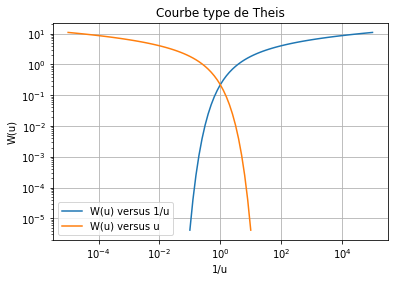

In [ ]:
# Representation graphique de la fonction de Theis

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# calcul de u avec echantillonnage log10
u = np.logspace(-5, 1, 61)

# paramétrage de la figure W(u) = f(1/u)
plt.title('Courbe type de Theis')
plt.xlabel('1/u')
plt.ylabel('W(u)')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.plot(1/u, sp.exp1(u),label='W(u) versus 1/u') # plot well function versus 1/u
plt.plot(u, sp.exp1(u),label='W(u) versus u') # plot well function versus u
plt.legend(loc='best')

plt.show()

Puisque $1/u$ est proportionnel à $t/r^2$, toutes les données qui ont le même $t/r^2$ vont s'aligner graphiquemebt sur le même $1/u$. Ainsi, pour un même test dans un aquifère homogène, tous les piézomètres s'aligneront sur la même courbe.

L'axe de la courbe de Theis et la courbe expérimentale sont différents d'un facteur constant, les données et $1/u$ peuvent être appariés par un décalage horizontal sur la représentation log. De plus, les valeurs de rabattement et la fonction de Theis sont également différents d'un facteur constant, donc les données et la courbe type peuvent être appariés par un déphasage vertical lorsqu'on utilise une échelle log pour la représentation graphique.

En résumé, cel implique que sur un graphique log-log, les données et la courbe type de Theis ont la même forme et peuvent être décalées horizontalement et verticalement pour qu'elles soient superposées. Les déphasages vertical et horizontal permettent de déterminer les deux facteurs qui permettent la détermination de la transmissivité et du coefficient d'emmagasinement: c'est la méthode graphique de Theis (cf. figure ci-après - Chapuis, 2007).

<figure>
  <IMG SRC="theis_graph.png" WIDTH=650 ALIGN="center">
</figure>


## Détermination des paramètres de l'aquifère
L'approche détaillée ici présente une méthodologie inspirée de la méthode graphique réelle, basée sur l'utilisation de graphiques "papier" et d'une abaque "r"elle" de la fonction de Theis. Cette approche serea présentée en TD en salle, si les conditions le permettent. L'avantage de la méthdoe rprésentée ici est de pouvoir être résolue de manière numérique (Matlab, Scilab, R, Python, ...), dès lors que la fonction de Theis peut être calculée.

Nous avons déterminé visuellement $A W(u)$ afin que la fonction de Theis $W(u)$ se superpose la courbe de rabattement $s$. Cela implique (7):

$$ s = A \,W(u) $$

Alors que le rabattement via la solution de Theis est (8):

$$ s  = \frac Q {4 \pi T} W(u) $$

Ainsi (9):

$$A = \frac Q {4 \pi T}$$

Et puisque nous avons déterminé la valeur de $A$ par essais erreurs, on calcule $T$ à partir de (10):

$$ T  = \frac Q {4 \pi A} $$

Le calage de la fonction de Theis sur les valeurs de rabattement sur l'axe horizontal a été obtenu non pas à partir de $1/u$ mais à partir de $B \times 1/u$ , cela rendant homogène l'axe horizontal de la courbe type de Theis avec l'axe $t / r^2$ du graphique des données.

On peut alos écrire (11):

$$ \frac t {r^2} = \frac B u = B \frac {4 T t} {r^2 S} = B \frac {4 T } S  \left( \frac t {r^2} \right) $$

Cela implique (12):

$$ B \frac {4 T} S = 1 $$

et donc (13)

$$ S = 4 T B$$

Avec $B$ et $T$ connus, pn peut déterminer $S$.

## Application 1: essai de nappe

Pour caractériser les propriétés hydrodynamiques d'un aquifère, un essai de nappe est réalisé. Un puits $F$ est pompé au débit de 547 litre/minute durant 12 heures. Les profondeurs sont enregistrés à un piézomètre $P_a$ situé à 8.2 mètres de $F$ (fichier TD_Theis1.txt). Le niveau statique de la nappe est $N_{stat} = -5.32$ mètre/repère.
1. Construire le graphique expérimental	log(s) = log10(t);
2. A l'aide de la solution de Theis, déterminer les paramètres hydrodynamiques de l'aquifère (T et S).

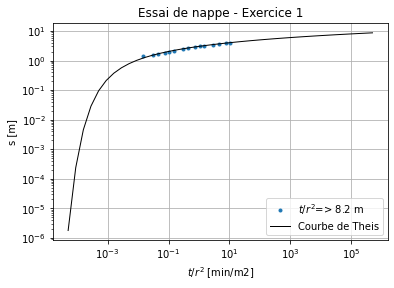

T = 0.101 m2/min
S  = 2.0e-04 [-]


In [8]:

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

fname ='TD_Theis1.txt'
data = np.loadtxt(fname,  skiprows=1) # chargement des donnees de l'essai de nappe - saute 1ere ligne
# colonnes sont [t[minutes], prof[m]] (voir 1ere ligne fichier texte)

r  = 8.2 #distance du piezometre d'observation
t = data[:,0]
s = data[:,1]-5.32 #prof(t) - prof(t=0)

# parametrage de la figrue figure
plt.title('Essai de nappe - Exercice 1')
plt.ylabel('s [m]')
plt.xlabel('$t/r^2$ [min/m2]')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.plot(t / r**2, s, '.',
             label='$t/r^2$=> {:.1f} m'.format(r)) # '.' signifie "points" pour les donnees

# on cherche à optimiser 2 variables A et B par essai/erreurs jusqu'à
# ce que les donnees experimentales "s" et la courbe de Theis "W(u)" se superposent au mieux

A = .43    # on affiche la courbe A * W(u)
B = 0.0005    # on utilise B * (1/u) pour l'axe horizontal de la courbe type de Theis
#correction
#A = .43 
#B = 0.0005

u = np.logspace(-9, 1, 41)

# plot shifted type curve
plt.plot(B *1/u, A * sp.exp1(u), 'k', lw=1, label='Courbe de Theis' )

plt.legend()
plt.show()

# Débit de pompage Q
Q = 0.547 # m3/min

# Estimation en premier de T, en utilisant la valeur optimisée de A
T = Q / (4 * np.pi * A)
print('T = {:.3f} m2/min'.format(T))

# Calcul de S à partir de T et la valeur optimisée de B
S = 4* B * T
print('S  = {:.1e} [-]'.format(S))

## Application 2: test de ‘Oude Korendijk, south of Rotterdam, The Netherlands' (In *Kruseman & de Ridder*)
La description du test est tirée de Kruseman & de Ridder pp. 56:

The lithological cross-section (figure) of the test site is derived from the borings. The first 18 m below the surface, consisting of clay, peat, and clayey fine sand, form the impermeable confining layer. Between 18 and 25 m below the surface lies the aquifer, which consists of coarse sand with some gravel. The base of the aquifer is formed by fine sandy and clayey sediments, which are considered impermeable.
<figure>
  <IMG SRC="cross_section.png" WIDTH=750 ALIGN="center">
</figure>
The well screen was installed over the whole thickness of the aquifer, and piezometers were placed at distances of 0.8, 30, 90, and 215 m from the well, and at different depths. The two piezometers at a depth of 30 m, H30, and H215 showed a drawdown during pumping, from which it could be concluded that the clay layer between 25 and 27 m is not completely impermeable. For our purposes, however, we shall assume that all the water was derived from the aquifer between 18 and 25 m, and that the base is impermeable. The well was pumped at a constant discharge of 9.12 L/s (or 788 m3/d) for nearly 14 hours.
    
1. Construire le graphique expérimental	log(s) = log10(t) pour les 3 piézomètres H30, H90 et H215;
2. A l'aide de la solution de Theis, déterminer les paramètres hydrodynamiques de l'aquifère (T et S) à partir des données de H30 et H90.
3. Quelles informations complémentaires peuvent apporter les données issues de H215? Cela vous semble t-il cohérent avec la coupe géologique?

[30.   30.    0.1   0.04]
[ 30.  90. 215.]


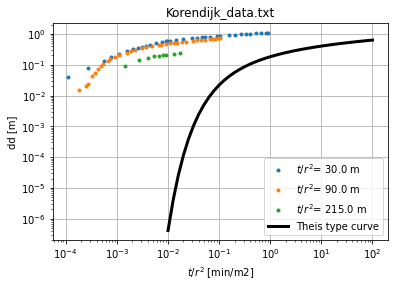

T = 4.4e-01 m2/min
T = 627.1 m2/d
S  = 1.742e-01 [-]
A comparer avec les valeurs trouvées in Kruseman and de Ridder: T=392 m2/d et S = 1.6 x 10-4


In [ ]:
fname ='Korendijk_data.txt' # Data de Krusemand & De Ridder
data = np.loadtxt(fname,  skiprows=1) # chargement des donnees de l'essai de nappe - saut 1ere ligne

# affichage des données (juste 1ere ligne 4 colonnes first 4 lines)
# Les colonnes sont [r[m], z[m], t[minutes], s[m]] (cf. fichier initial .txt)
data[:4] 
print(data[0])

# Le nombre de valeurs uniques de la première colonne définissent également le nombre de piézomètres dont nous disposons
distances = np.unique(data[:, 0])
print(distances)


# parametrage de la figure
plt.title(fname)
plt.ylabel('dd [m]')
plt.xlabel('$t/r^2$ [min/m2]')
plt.xscale('log')
plt.yscale('log')
plt.grid()

# plot the data pour chaque piezometre
for r in distances:
    I = data[:, 0] == r # creation d'un index

    # selection des temps pour chaque piezometre
    t = data[I,2] # [min]
    
    plt.plot(t / r**2, data[I,3], '.',
             label='$t/r^2$= {:.1f} m'.format(r)) 

# Deux constantes à optimiser par essais / erreurs
# jusqu'à ce que les mesures et les données theoriques correspondent au mieux
A = .1 # on va afficher ensuite A * W(u)
B = 0.1    # on va utiliser B * (1/u) pour l'axe horizontal de la curbe de Theis

# Valeurs estimees Larroque pour ajustement de la courbe theorique
# A = .161 
# B = 0.00018

u = np.logspace(-3, 1, 41)

# plot la courbe theorique ajustée
plt.plot(B *1/u, A * sp.exp1(u), 'k', lw=3, label='Theis type curve' )

plt.legend()
plt.show()

# Saisie du débit constant du test Q
Q = 788/(24*60) # m3/min

# Calcul de T, en utilisant la valeur optimisee de A
T = Q / (4 * np.pi * A)
print('T = {:.1e} m2/min'.format(T))
print('T = {:.1f} m2/d'.format(T*(24*60)))

# avec T et la valeur optimisee de B, on calcule S
S = 4* B * T
print('S  = {:.3e} [-]'.format(S))

print('A comparer avec les valeurs trouvées in Kruseman and de Ridder: T=392 m2/d et S = 1.6 x 10-4')

## Bibliographie

Kruseman, G.P. & N.D. de Ridder (1994) Pumping test analysis. Disponible sur Internet.